In [52]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import copy 

In [53]:
#Model stations as objects
class Station: 
    num_station = 0 #number of stations
    def __init__(self,x,y,name):        
        self.id = Station.num_station
        self.x = x
        self.y = y
        self.name = name
        Station.num_station = Station.num_station + 1

def getStationPerId(Stations,id):#return station based on id
    numS = len(Stations)
    for i in range(0,numS):
        mStation = Stations[i]
        if(mStation.id == id):
            return mStation

In [54]:
#Create plot function for stations        
def plotStations(Stations,rootStation,seq,title=''):
    node_size = 80
    numS = len(Stations)
    plt.figure(1)
    plt.scatter(rootStation.x,rootStation.y,s=int(3*node_size),c="r")
    
    Station1 = getStationPerId(Stations,seq[0])#link root with first station
    X = np.array([Station1.x,rootStation.x])#X array
    Y = np.array([Station1.y,rootStation.y])#Y array
    plt.plot(X,Y,'r-')#plot line between two stations
    plt.scatter(Station1.x,Station1.y,s=node_size,c="b")#plot station 1
    
    for i in range(0,numS-1):
        Station1 = getStationPerId(Stations,seq[i])
        Station2 = getStationPerId(Stations,seq[i+1])
        X = np.array([Station1.x,Station2.x])#X array
        Y = np.array([Station1.y,Station2.y])#Y array
        plt.plot(X,Y,'r-')#plot line between two stations
        plt.scatter(Station1.x,Station1.y,s=node_size,c="b")#plot station 1
    
    Station1 = getStationPerId(Stations,seq[numS-1])
    plt.scatter(Station1.x,Station1.y,s=node_size,c="b")#plot station 1
    plt.title(title)
    plt.show()

In [55]:
#Create objective functions
def dist(x1,y1,x2,y2):
    d = np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2) )
    return d

def objFunc(Stations,rootStation,seq):#find the accumulated distance between town
    numS = len(Stations)
    Station1 = getStationPerId(Stations,seq[0])
    d = dist(rootStation.x,rootStation.y,Station1.x,Station1.y)
    
    for i in range(0,numS-1):
        Station1 = getStationPerId(Stations,seq[i])
        Station2 = getStationPerId(Stations,seq[i+1])
        d =  d+dist(Station2.x,Station2.y,Station1.x,Station1.y)
    return d

In [56]:
#Create Crossover Operator
def xover_func(seq1,seq2,ch):#mate the sequence
    Ns = len(seq1)    
    #separate sequence in twos
    mi = np.math.floor(Ns/2) #middle index
    
    seq11 = seq1[0:mi]
    
    seq21 = seq2[0:mi]  
    
    if ch==1: #get first child
        child = seq11
        for k in range(0,Ns):
            v = np.where(child == seq2[k])
            if(len(v[0]) == 0):#element not in sequence
                child = np.concatenate((child,[seq2[k]]))
    else:
        child = seq21
        for k in range(0,Ns):
            v = np.where(child == seq1[k])
            if(len(v[0]) == 0):#element not in sequence
                child = np.concatenate((child,[seq1[k]]))
    return child

In [57]:
#Create Muation Operator
def mutate_func(seq1,mr):
    Ns = len(seq1)#lenght of sequence
    Mn = np.math.floor(Ns*mr)#mutation number
    dice = np.arange(0,10)
    np.random.shuffle(dice)
    
    if dice[0] < 5:            
        startr = np.arange(0,Ns-Mn)        
        for i in range(1,10):
            np.random.shuffle(startr)           
        start = startr[0]        
        seg = copy.deepcopy(seq1[start:(start+Mn)])
        np.random.shuffle(seg)        
        child0 = copy.deepcopy(seq1[0:start])
        childn = copy.deepcopy(seq1[(start+Mn):Ns])               
        child = np.concatenate((child0,seg,childn))#mutated
    else:        
        endr = np.arange(Mn-1,Ns)       
        for i in range(1,10):
            np.random.shuffle(endr)
        end = endr[0]
        #print("end:"+str(end))
        seg = copy.deepcopy(seq1[(end-Mn+1):(end+1)])
        np.random.shuffle(seg)
        child0 = copy.deepcopy(seq1[0:(end-Mn+1)])
        childn = copy.deepcopy(seq1[(end+1):Ns])
        child = np.concatenate((child0,seg,childn))#mutated
        
    return child

In [58]:
    
class Sequence:#class for sequence   
    def __init__(self,seq):
        self.seq = seq
        self.obj_val = np.Inf 

def ga_operation(gen_limit,n,max_gen):    
    seq = np.arange(1,n)
    BestChild = Sequence(seq)#BestChild
    BestChild.obj_val = objFunc(Stations,rootStation,BestChild.seq)
    
    Pop = []
    NewGenPop = []
    
    for g in range(0,gen_limit):
        print("Generation "+str(g)+"....")
        #population generation    
        if g == 0: #first generation            
            for i in range(0,max_gen):                
                np.random.shuffle(seq)
                pop = copy.deepcopy(Sequence(seq))                
                pop.obj_val = objFunc(Stations,rootStation,pop.seq)
                Pop.append(pop)#create an initial population    
                #print("Po_seq: "+str(Pop[i].seq))    
        else:
            Pop = NewGenPop
            for i in range(0,max_gen):#evaluate fitness
                Pop[i].obj_val = objFunc(Stations,rootStation,Pop[i].seq)
                #print("Po_seq: "+str(Pop[i].seq))
        
        #sort population based on objective value
        for i in range(0,max_gen):
            for j in range(0,MaxGen-1):
                if Pop[j].obj_val > Pop[j+1].obj_val:#ascending order
                    temp = Pop[j]
                    Pop[j] = Pop[j+1]
                    Pop[j+1] = temp
          
        
        #pick the current best
        if BestChild.obj_val > Pop[0].obj_val: #the best of the elite is the optimum
            BestChild = copy.deepcopy(Pop[0])
        
        print("Sequence: "+str(BestChild.seq))
        print("Obj func: "+str(BestChild.obj_val)+"\n")
        
        #plot current status
        title = 'GA - generation %d - best_fitness:%.3f'%(g,BestChild.obj_val)
        plotStations(Stations,rootStation,BestChild.seq,title)#plot all stations
        
        if (g+1) == gen_limit:
            return BestChild #break the loop
                  
        #pick parents: elite        
        bestN = int(max_gen*er)
        xoverN = int(max_gen*xr)
        
      
        ElitePop = Pop[0:bestN] #Pick elite children
        NewGenPop = ElitePop #passed to new generation already
         
        
        #crossover
        xrNum = 0
        eRng = np.arange(0,bestN)#elite range
        
        while xrNum < xoverN:
            #crossovering
            np.random.shuffle(eRng)
            Pr = eRng[0:2]
            #print("crosswover parent id:" + str(Pr))
            #print("seqs: "+str(ElitePop[0].seq))
            #print("seqs: "+str(ElitePop[1].seq))            
            
            Parent1 = ElitePop[Pr[0]] #Parent 1
            Parent2 = ElitePop[Pr[1]] #Parent 2
            
            seq1 = Parent1.seq
            seq2 = Parent2.seq            
            #print('Elite parent sequence1: '+str(seq1))
            #print('Elite parent sequence2: '+str(seq2))                     
            
            #two children created
            Child1 = copy.deepcopy(Sequence(xover_func(seq1,seq2,1)))
            Child2 = copy.deepcopy(Sequence(xover_func(seq1,seq2,2)))
            
            #print('Child1:'+str(Child1.seq))
            #print('Child2:'+str(Child2.seq))
        
            NewGenPop.append(Child1)
            NewGenPop.append(Child2)
            xrNum = xrNum + 2
    
        #mutation
        mutN = max_gen - bestN - xoverN
        mN = 0
       
        while mN < mutN:
            #mutation process
            coin = np.arange(1,11)
            np.random.shuffle(coin)
            
            Child = Sequence([])
            
            if coin[0] < np.math.floor(mf*10): #elite parent mutation
                np.random.shuffle(eRng)                
                Parent = ElitePop[eRng[0]] #Parent under mutation process
                seqt = Parent.seq #pick sequence                
                #print('Parent seq: '+str(Parent.seq))
            else:
                rng = np.arange(bestN,max_gen)#other elementts    
                np.random.shuffle(rng)
                Parent = Pop[rng[0]]
                seqt = Parent.seq #pick sequence
                #print('Parent seq: '+str(Parent.seq))
            #mutation      
            Child.seq = mutate_func(seqt,mr) #mutation sequence          
            NewGenPop.append(Child)#new child
            mN = mN + 1#add to mutation      

In [59]:
#load stattions locations
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/metaheuristics/ga/ga_data.csv')
num_stations = len(df)-1


Stations = [] #load stations location
for i in range(0,num_stations):
    name = str(df.iloc[i,0])
    x = df.iloc[i,1]
    y = df.iloc[i,2]
    if i==0:
        name = "root"
        mStation = Station(x,y,name)
        rootStation = mStation
    else:     
        mStation = Station(x,y,name)
        Stations.append(mStation)
    
df.head()

id         x         y
0   0 -2.000000  2.000000
1   1 -0.102643 -0.949980
2   2 -0.284615 -0.343232
3   3 -1.068142 -0.707530
4   4 -1.574873  0.779341

In [60]:
num_stations

15

Generation 0....
Sequence: [ 4 14  3 12  7  8 13  9 11  5 10  1  2  6]
Obj func: 19.50218410563926



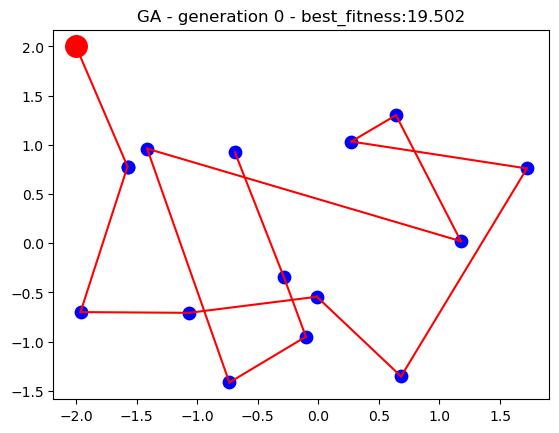

Generation 1....
Sequence: [ 4 14  3 12  7  8 13  9  5  6  2  1 10 11]
Obj func: 18.084397927040044



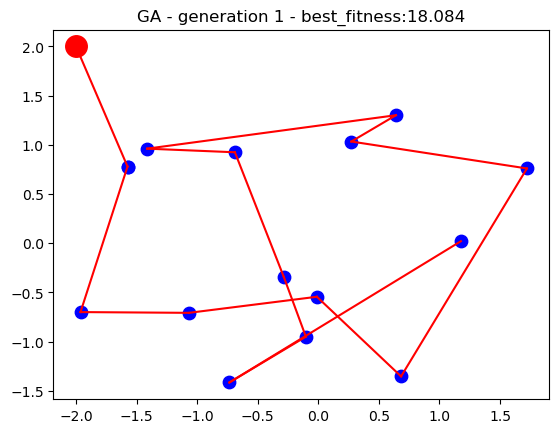

Generation 2....
Sequence: [ 4  5  6  9 13  1 12 14  3  7 10  2 11  8]
Obj func: 16.25883815366316



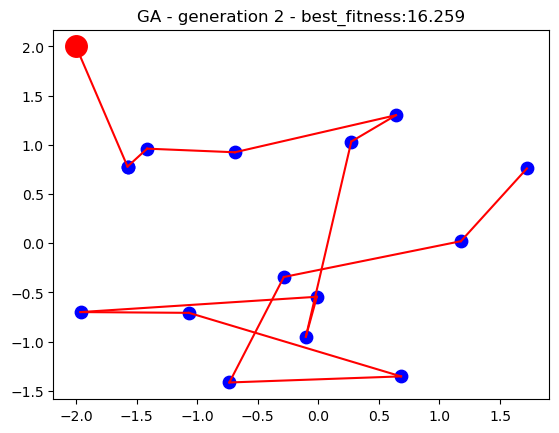

Generation 3....
Sequence: [ 4  5  6  9 13 12  7  1 14  3  2 10 11  8]
Obj func: 15.760214311838313



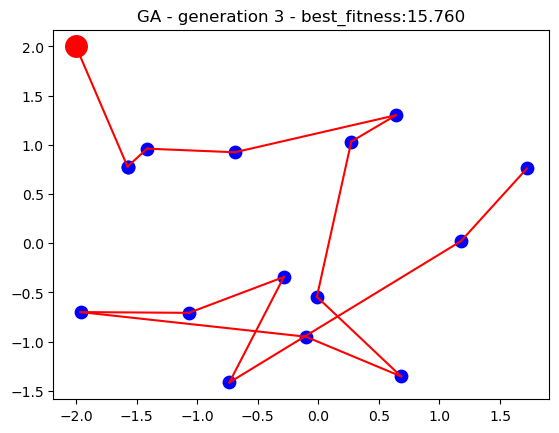

Generation 4....
Sequence: [ 4  5  6  9 13 12  7  1 14  3  2 10 11  8]
Obj func: 15.760214311838313



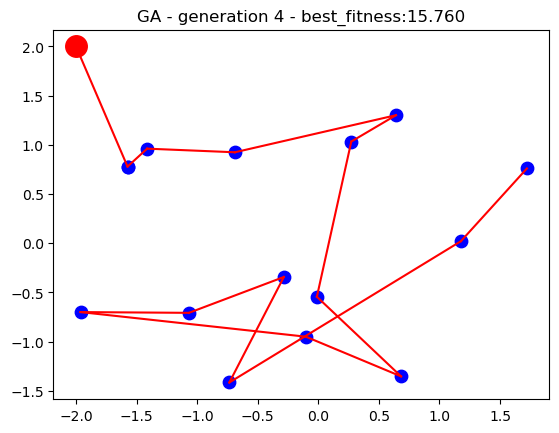

Generation 5....
Sequence: [ 4  5  6  9 13  1 12 14  3  2 10  7 11  8]
Obj func: 15.210185404227527



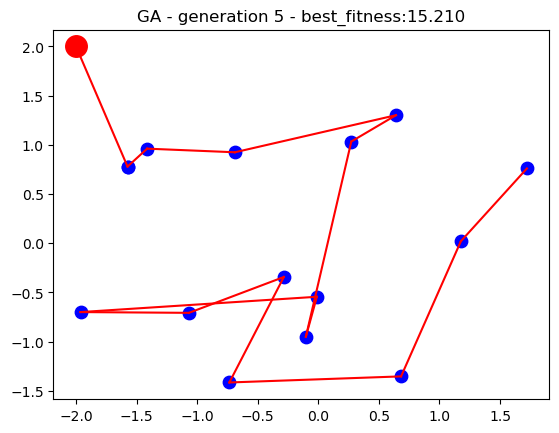

Generation 6....
Sequence: [ 5  4 14  3  2 10  1  7 12  6  9  8 11 13]
Obj func: 15.107106173083473



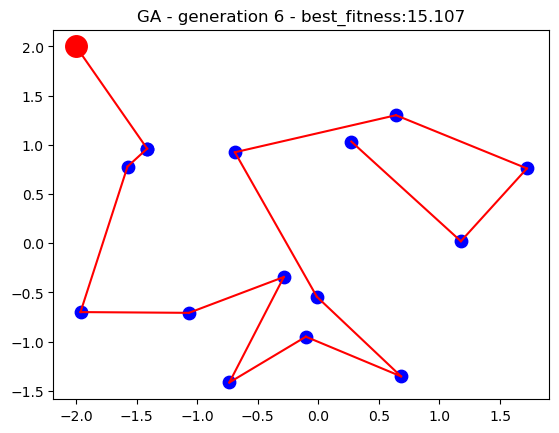

Generation 7....
Sequence: [ 4  5  6  9 13 12  8 11  7  1  2  3 14 10]
Obj func: 14.948257501238858



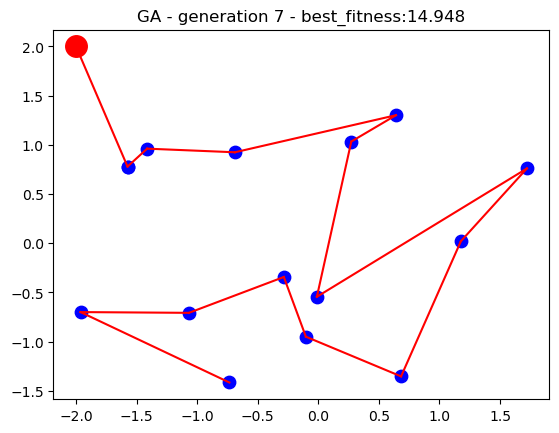

Generation 8....
Sequence: [ 5  4 14  3  7  1  2 10 12  6 13  9 11  8]
Obj func: 14.885573848662455



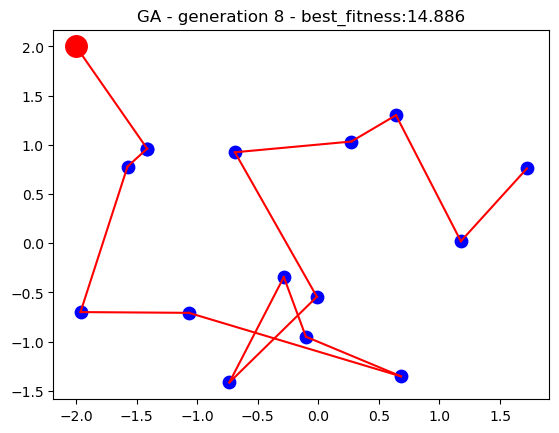

Generation 9....
Sequence: [ 5  4 14  3  7  1  2 12 10 11  8  9 13  6]
Obj func: 14.655596521747706



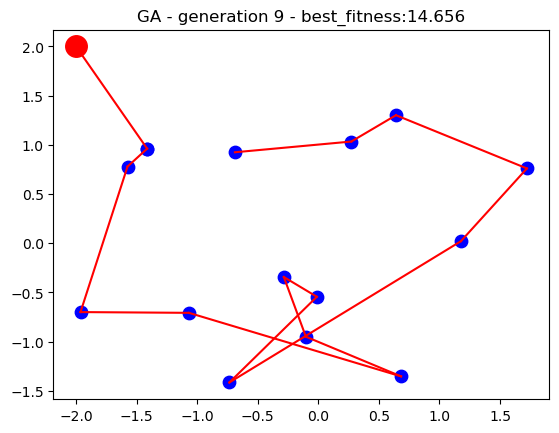

Generation 10....
Sequence: [ 5  4 14  3 10 12  1  7  2  6  9 13  8 11]
Obj func: 14.035581565849169



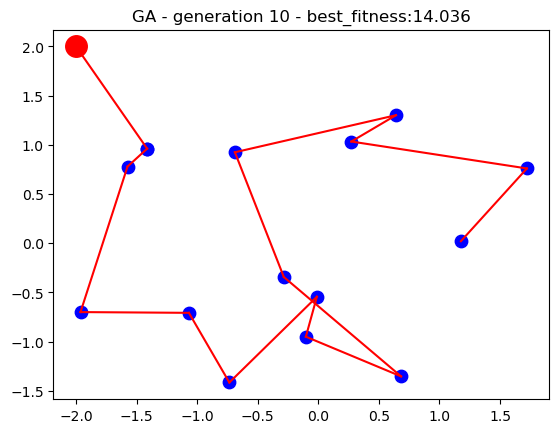

Generation 11....
Sequence: [ 5  4 14  3  2 10  1  7 12 11  8  9 13  6]
Obj func: 13.488425118429822



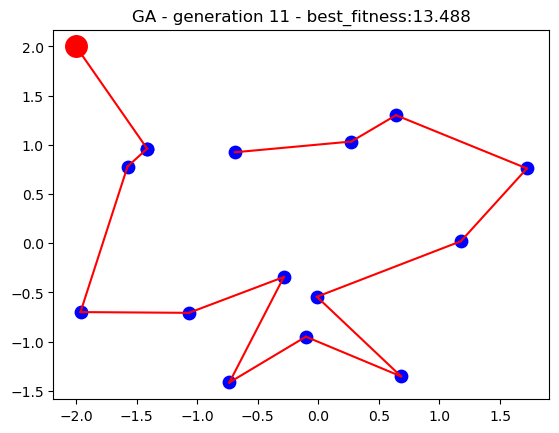

Generation 12....
Sequence: [ 5  4 14  3  2 10  1  7 12 11  8  9 13  6]
Obj func: 13.488425118429822



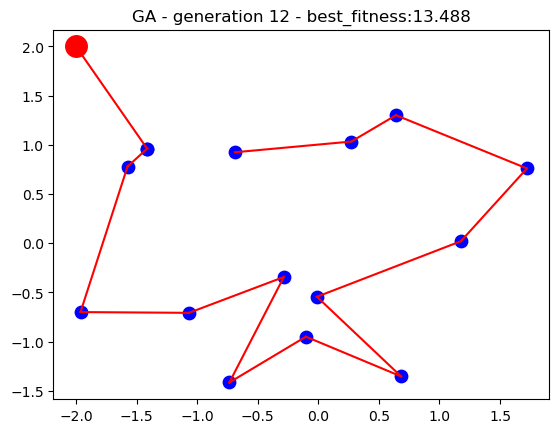

Generation 13....
Sequence: [ 5  4 14  3 10 12  1  2  7 11  8  9 13  6]
Obj func: 13.233851030927402



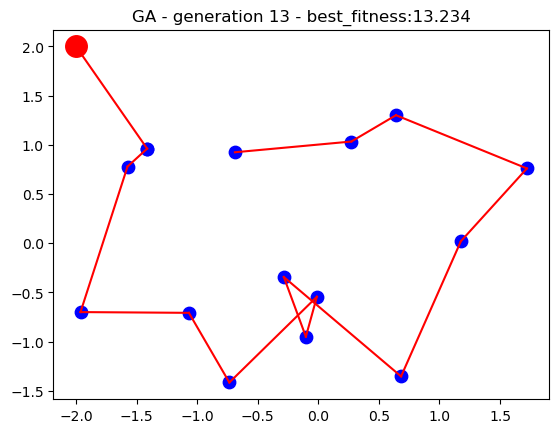

Generation 14....
Sequence: [ 5  4 14  3 10 12  1  2  7 11  8  9 13  6]
Obj func: 13.233851030927402



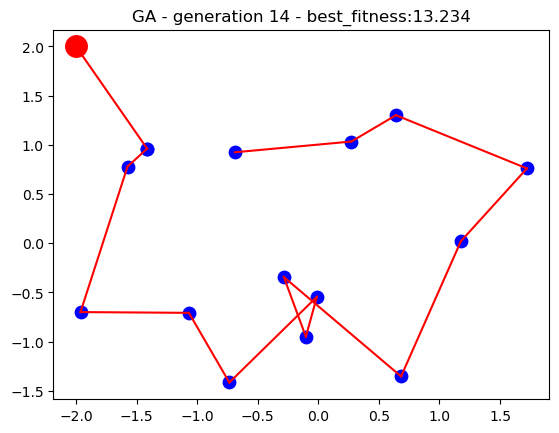

Generation 15....
Sequence: [ 5  4 14  3 10 12  1  2  7 11  8  9 13  6]
Obj func: 13.233851030927402



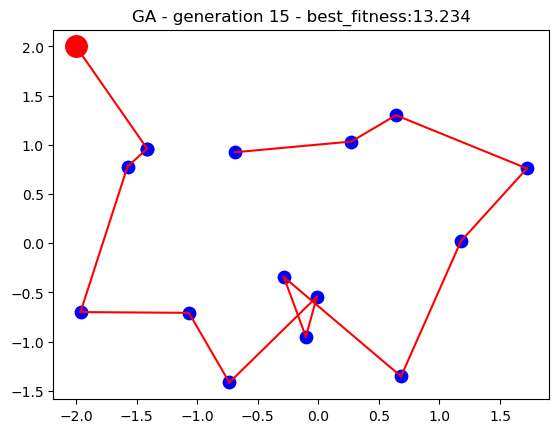

Generation 16....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



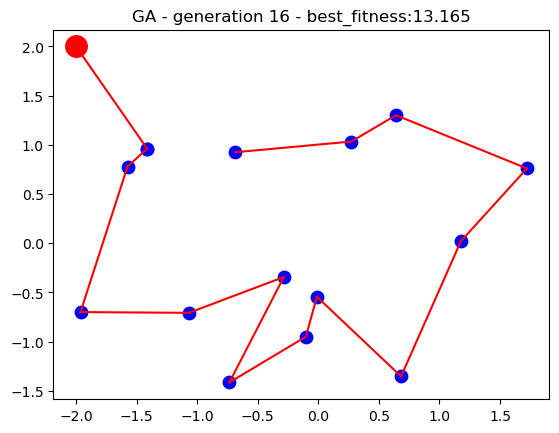

Generation 17....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



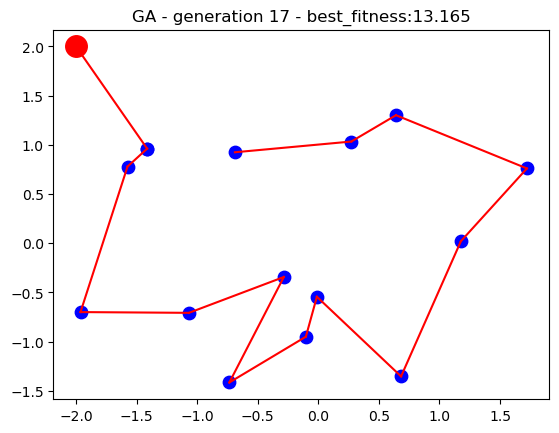

Generation 18....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



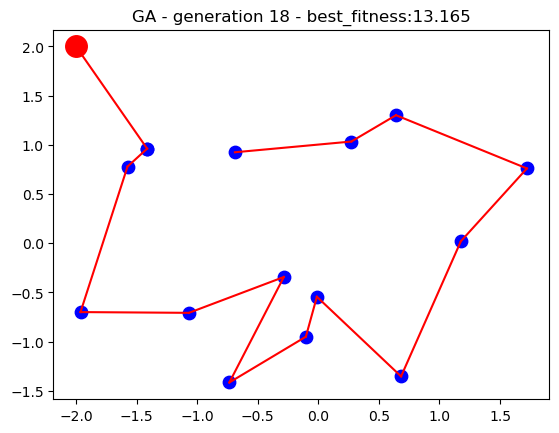

Generation 19....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



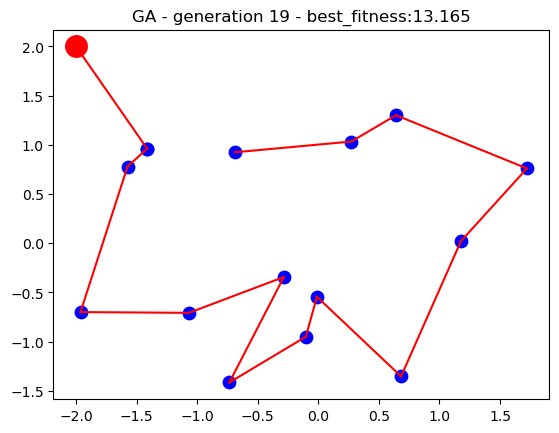

Generation 20....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



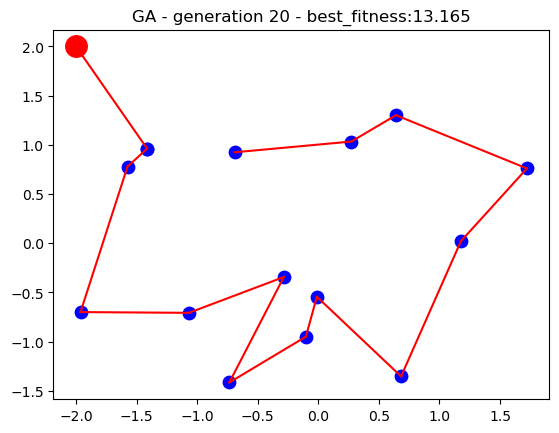

Generation 21....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



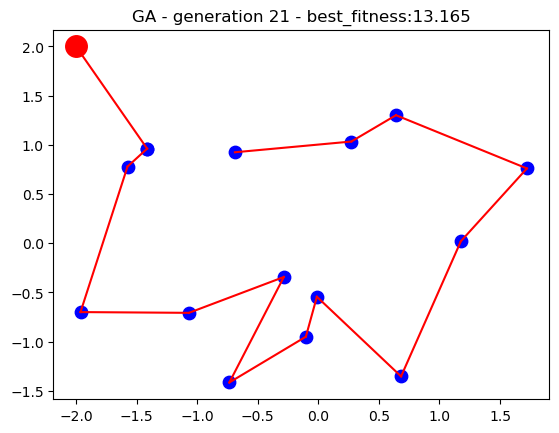

Generation 22....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



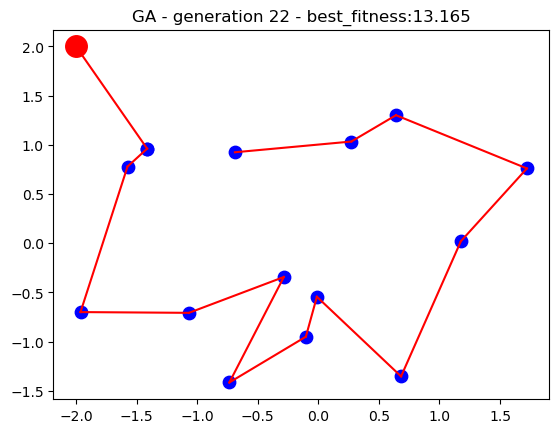

Generation 23....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



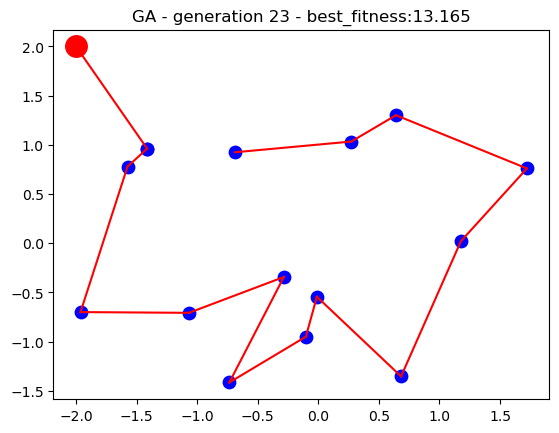

Generation 24....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



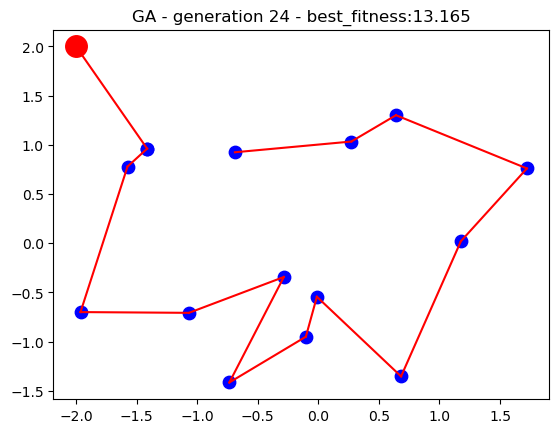

Generation 25....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



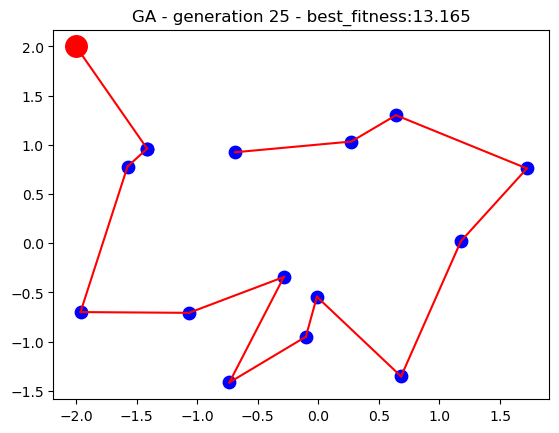

Generation 26....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



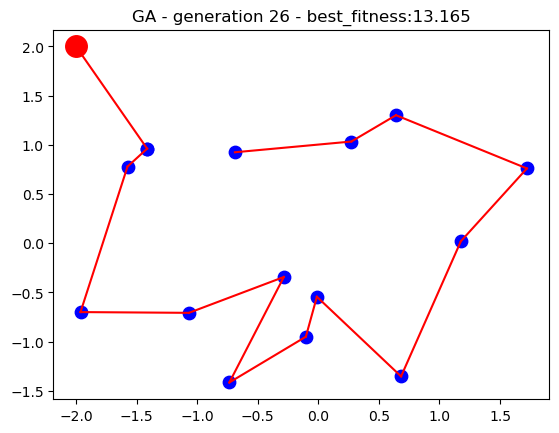

Generation 27....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



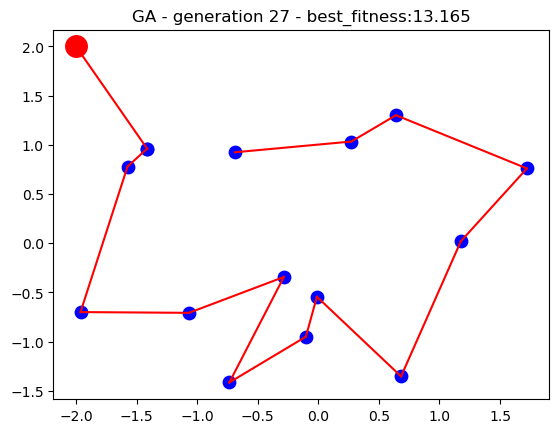

Generation 28....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



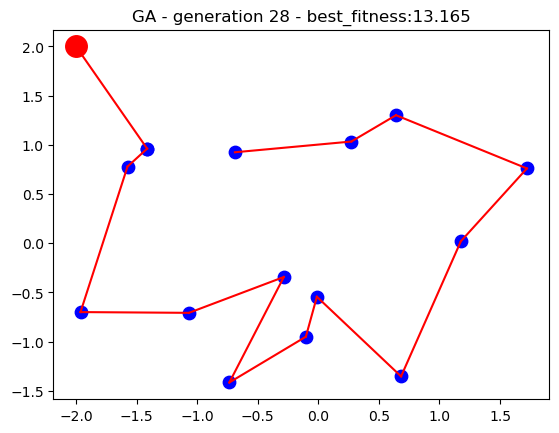

Generation 29....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



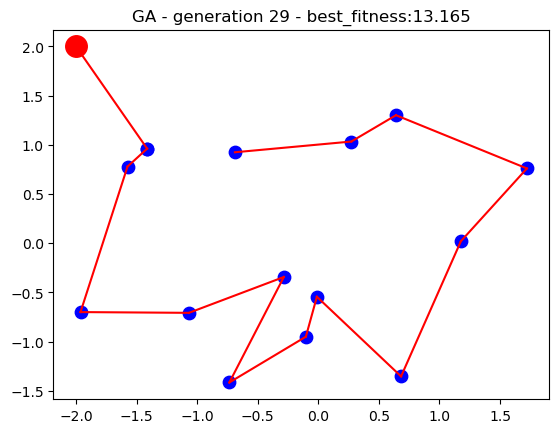

Generation 30....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



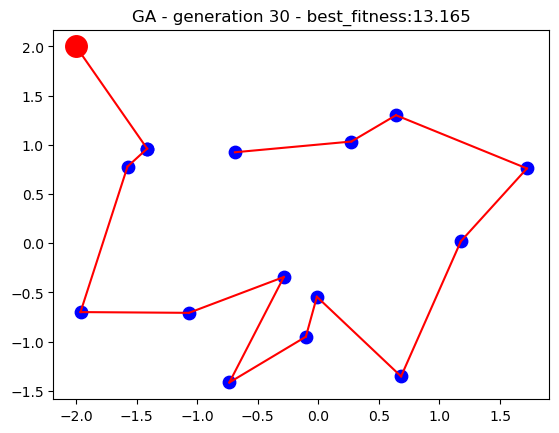

Generation 31....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



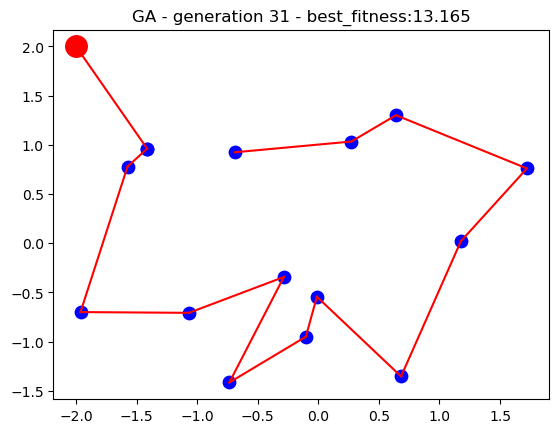

Generation 32....
Sequence: [ 5  4 14  3  2 10  1 12  7 11  8  9 13  6]
Obj func: 13.164963436285385



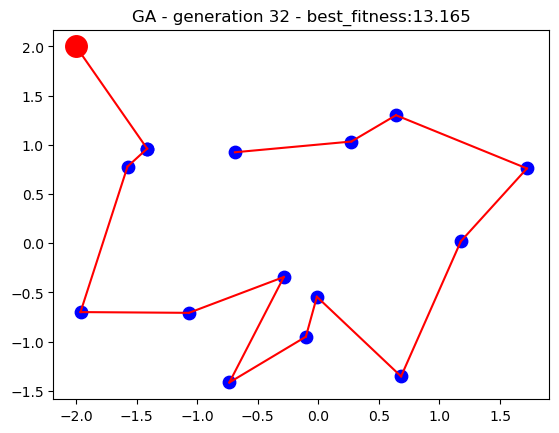

Generation 33....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



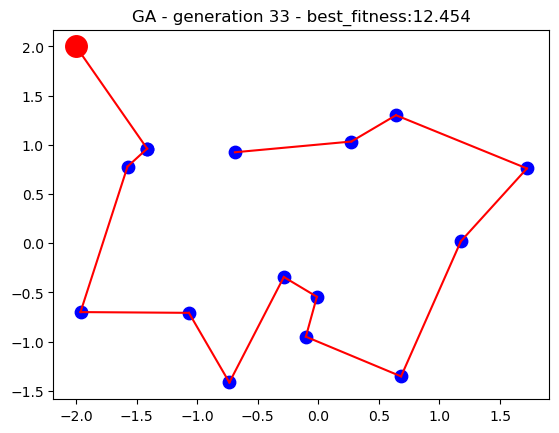

Generation 34....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



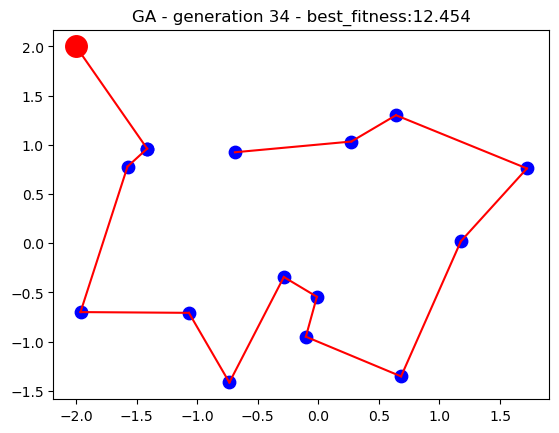

Generation 35....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



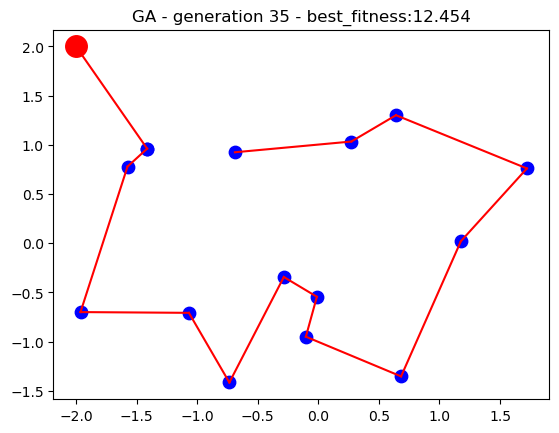

Generation 36....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



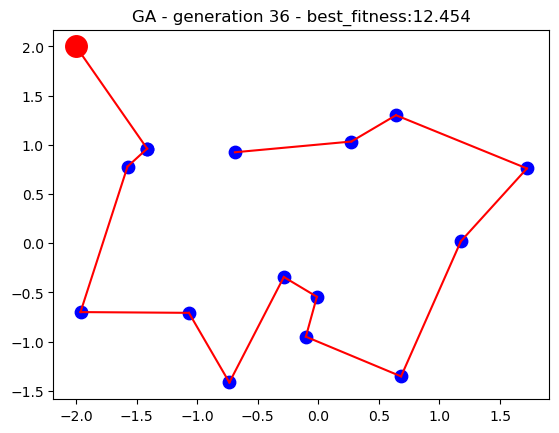

Generation 37....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



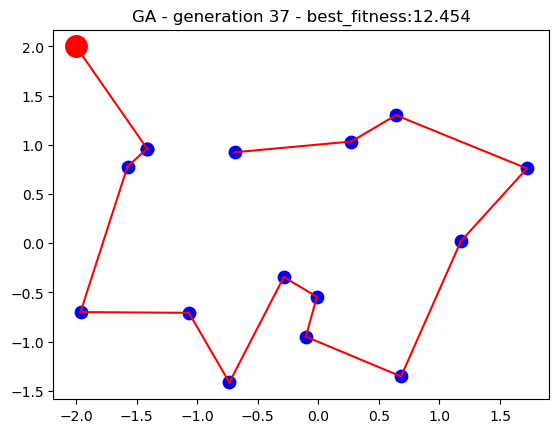

Generation 38....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



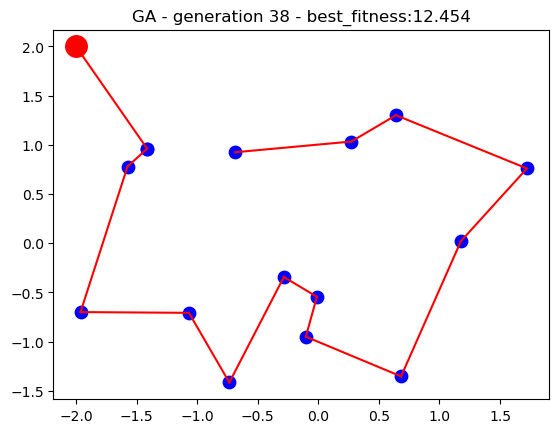

Generation 39....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



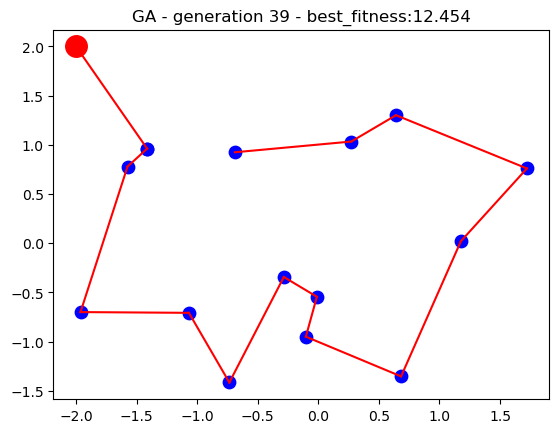

Generation 40....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



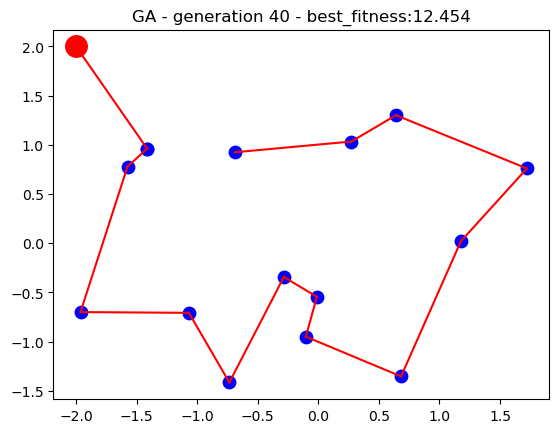

Generation 41....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



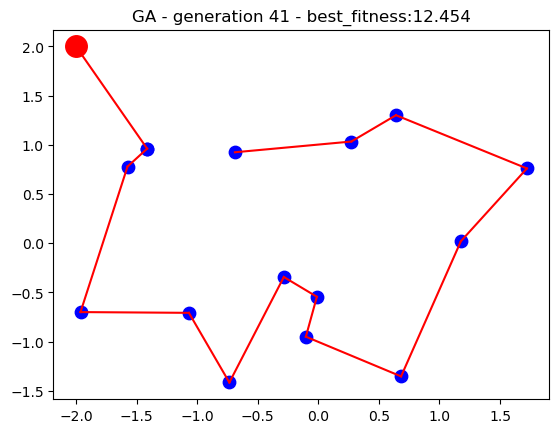

Generation 42....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



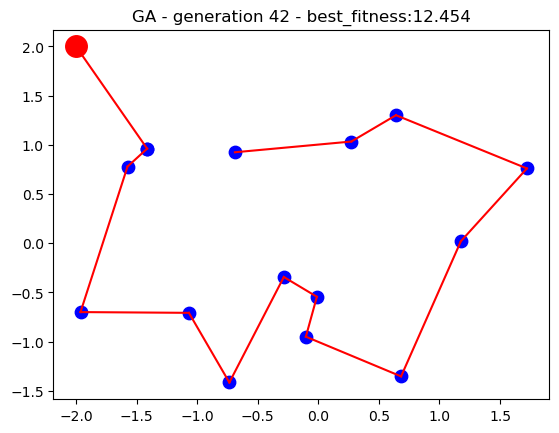

Generation 43....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



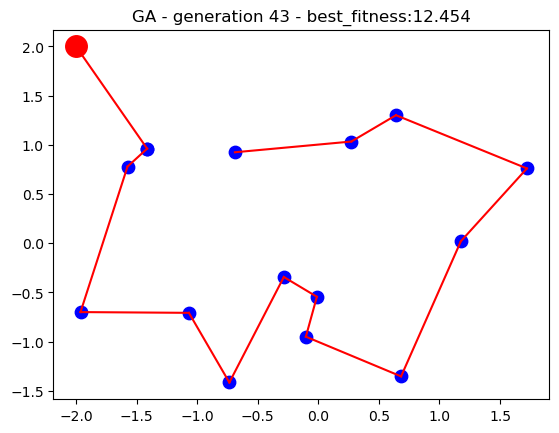

Generation 44....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



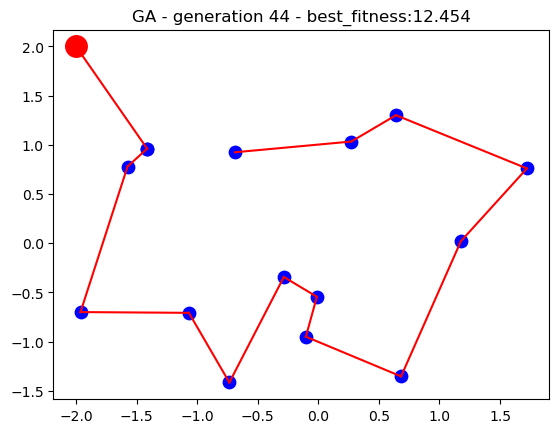

Generation 45....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



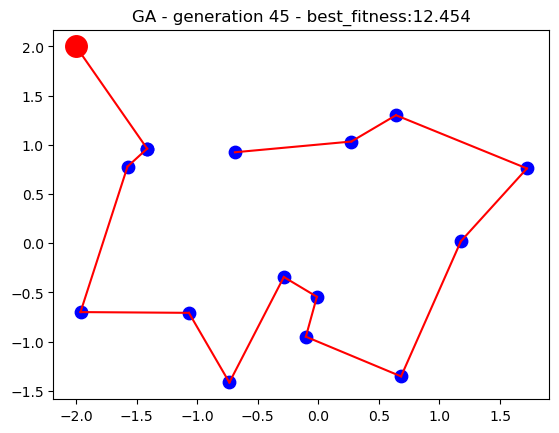

Generation 46....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



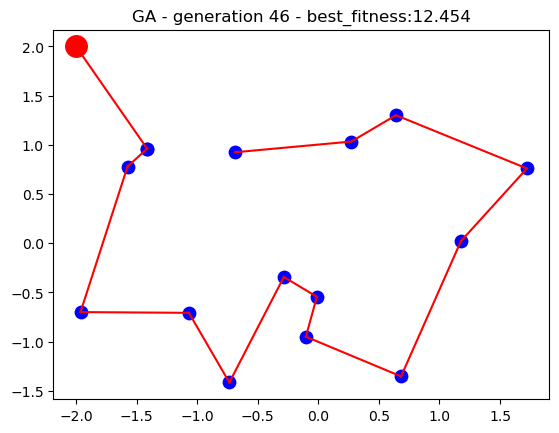

Generation 47....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



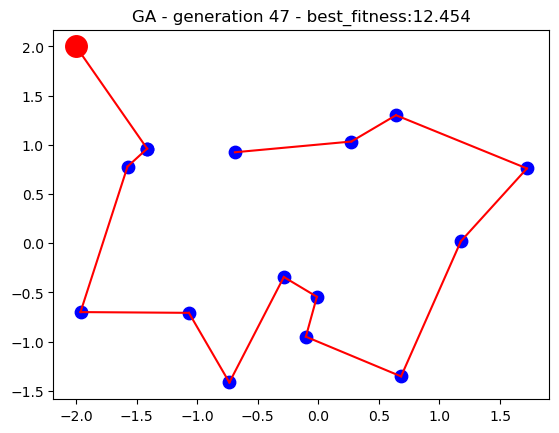

Generation 48....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



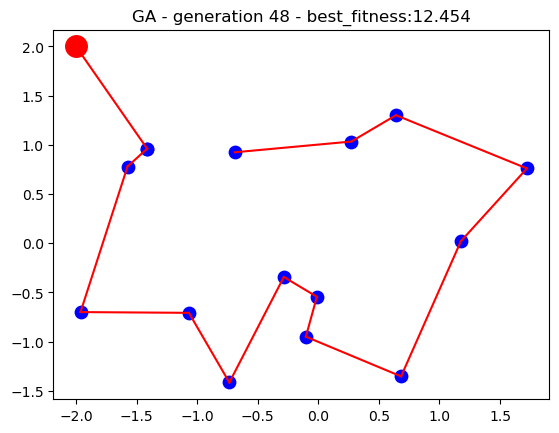

Generation 49....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



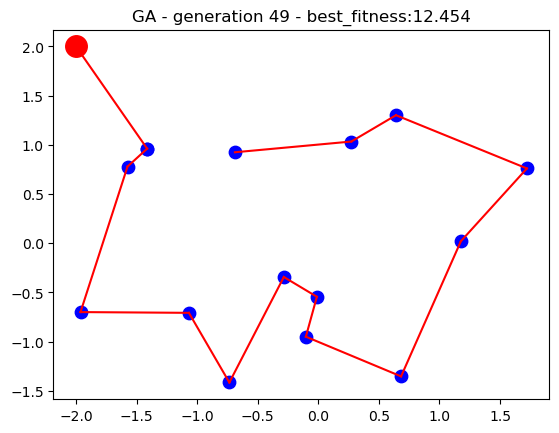

Generation 50....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



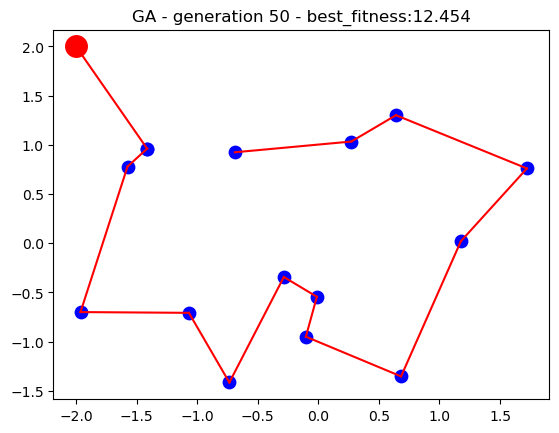

Generation 51....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



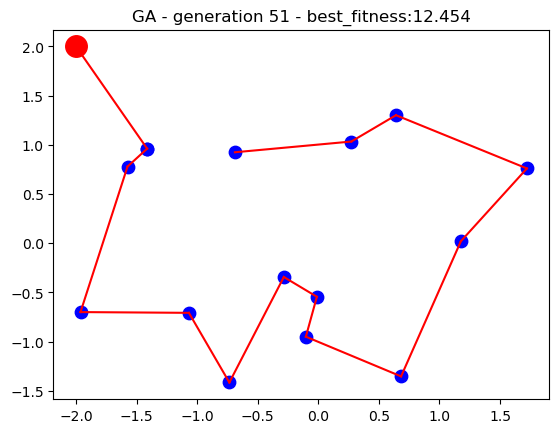

Generation 52....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



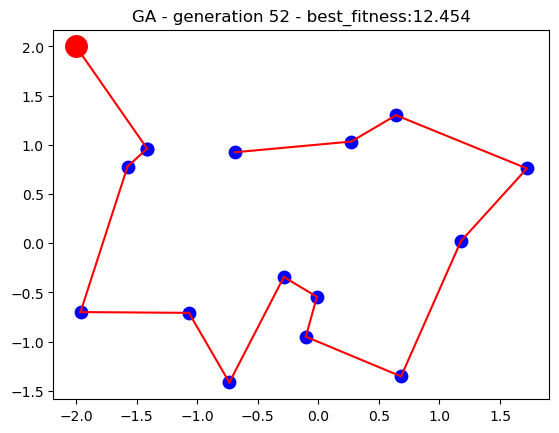

Generation 53....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



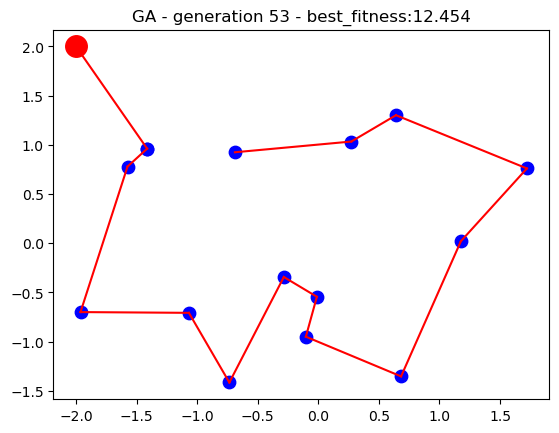

Generation 54....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



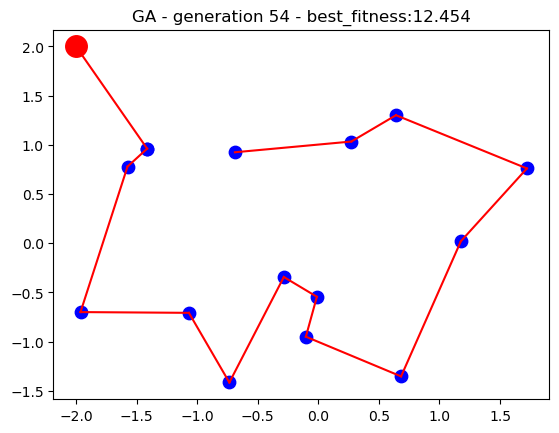

Generation 55....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



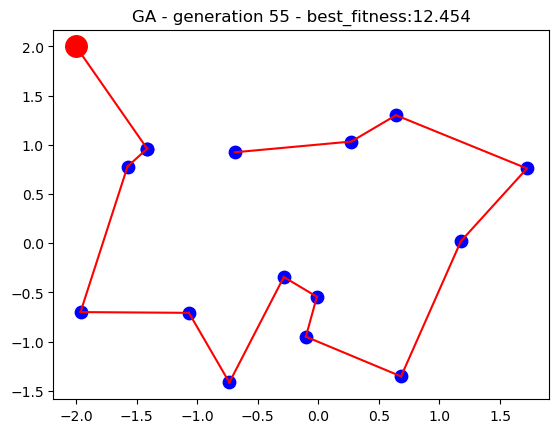

Generation 56....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



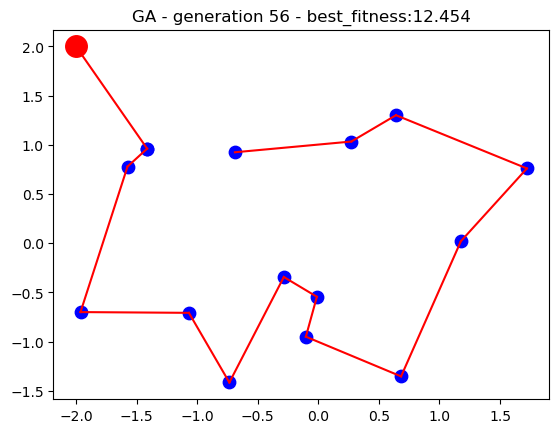

Generation 57....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



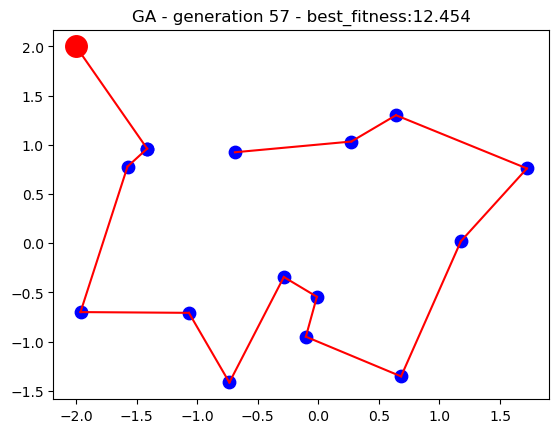

Generation 58....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



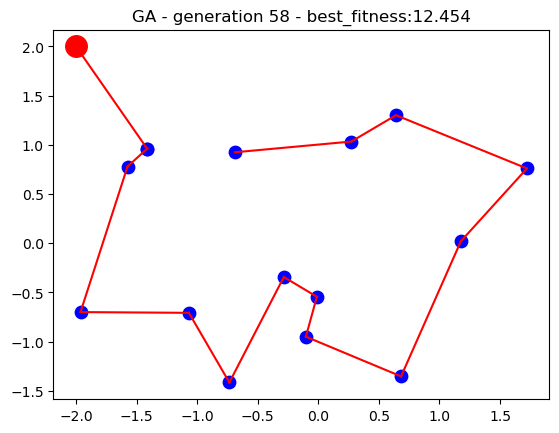

Generation 59....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



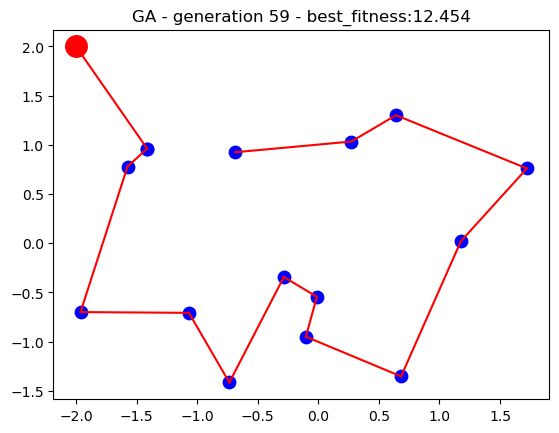

Generation 60....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



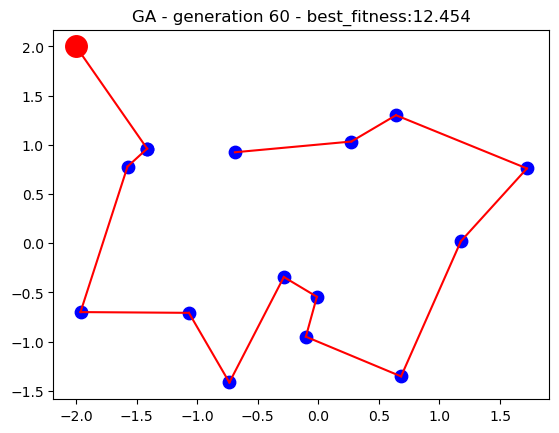

Generation 61....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



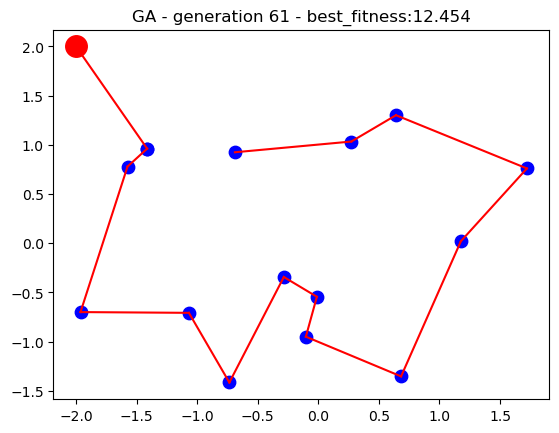

Generation 62....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



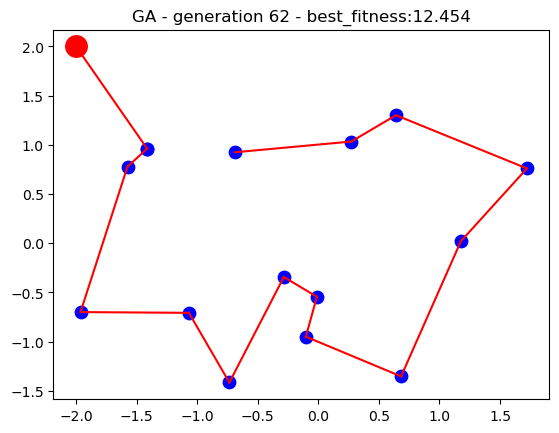

Generation 63....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



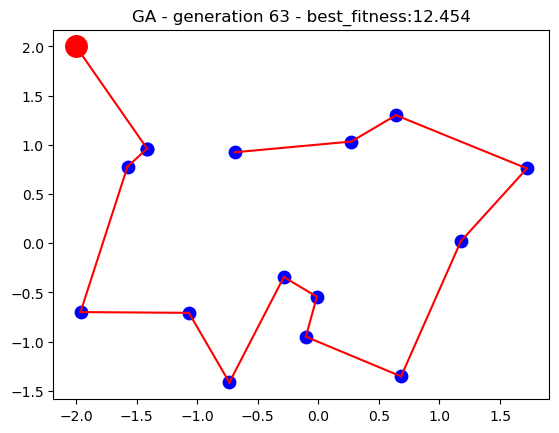

Generation 64....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



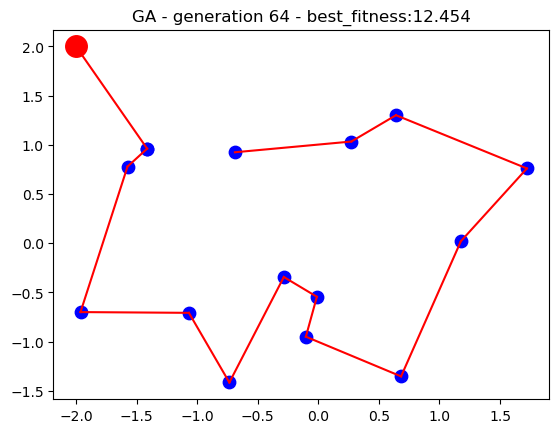

Generation 65....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



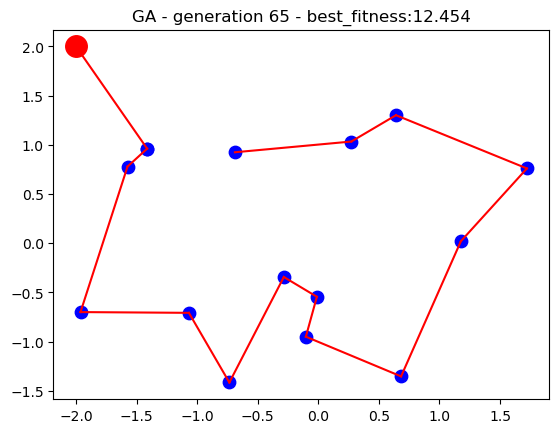

Generation 66....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



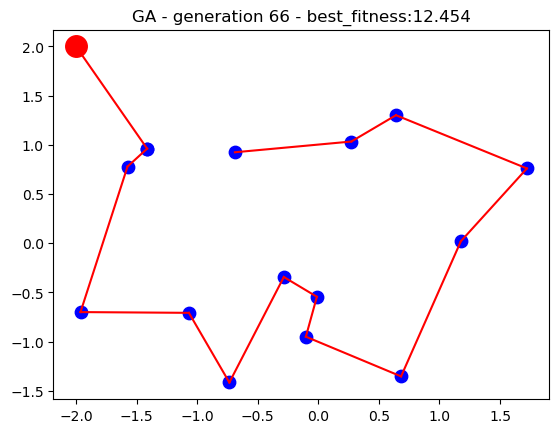

Generation 67....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



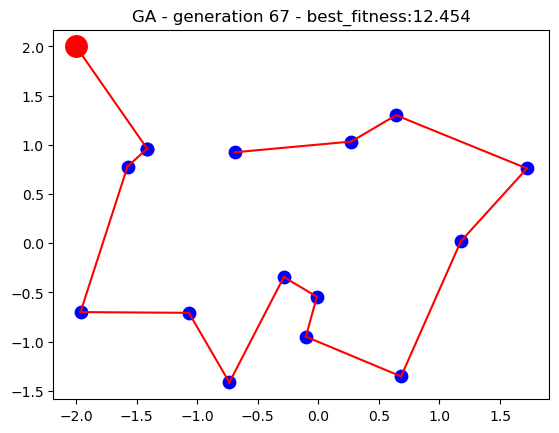

Generation 68....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



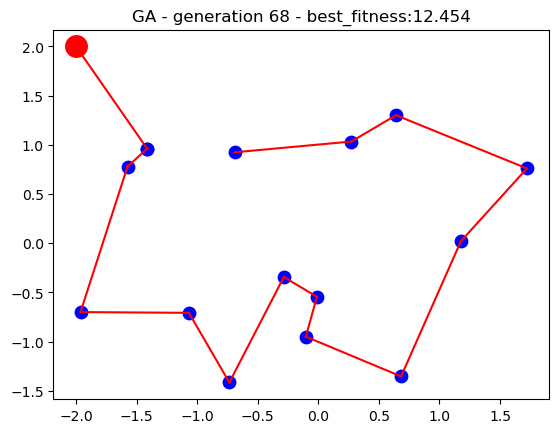

Generation 69....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



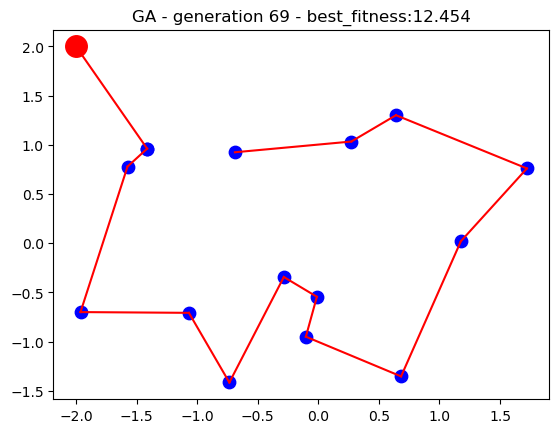

Generation 70....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



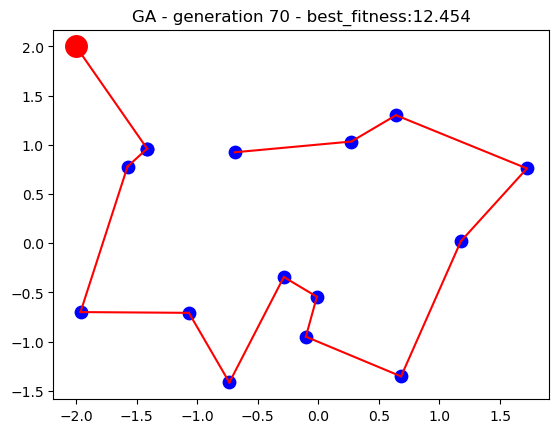

Generation 71....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



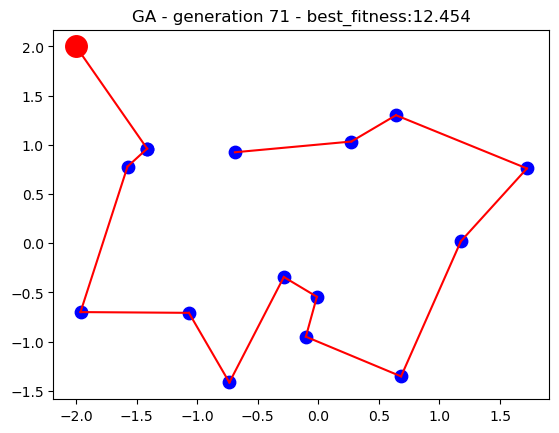

Generation 72....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



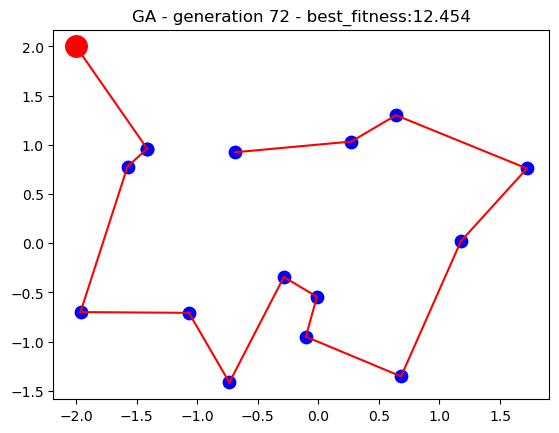

Generation 73....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



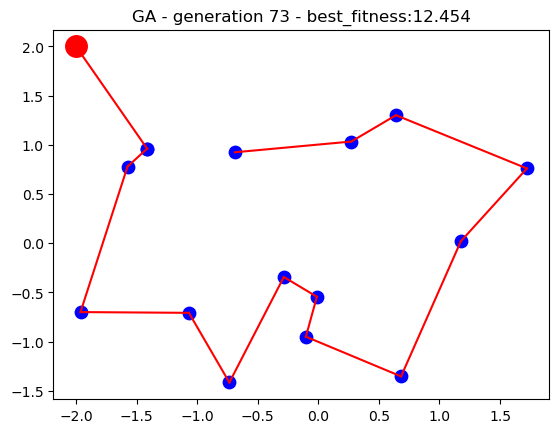

Generation 74....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



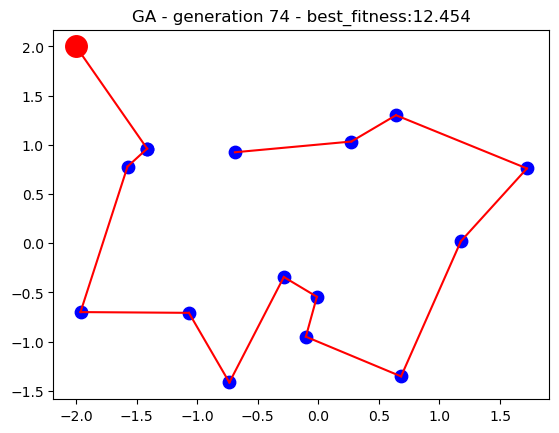

Generation 75....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



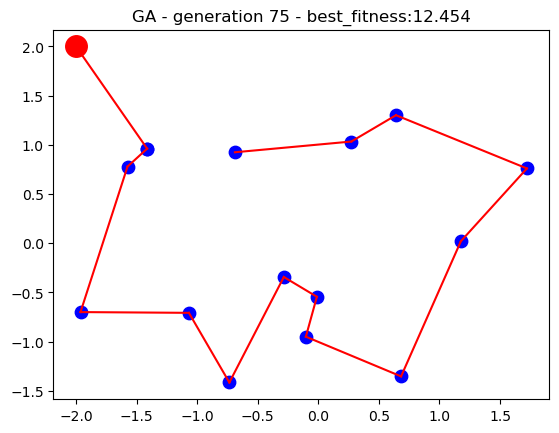

Generation 76....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



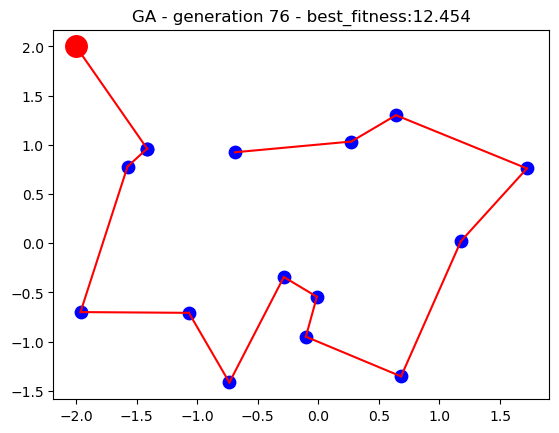

Generation 77....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



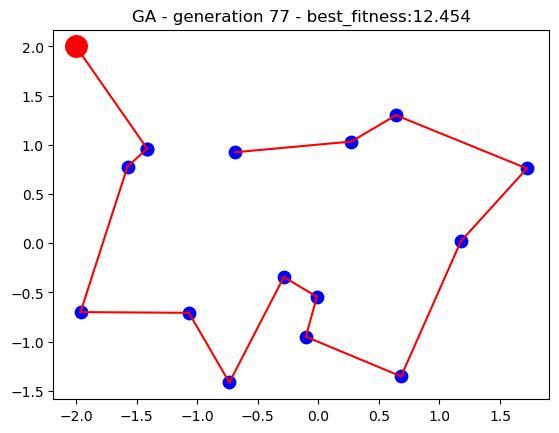

Generation 78....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



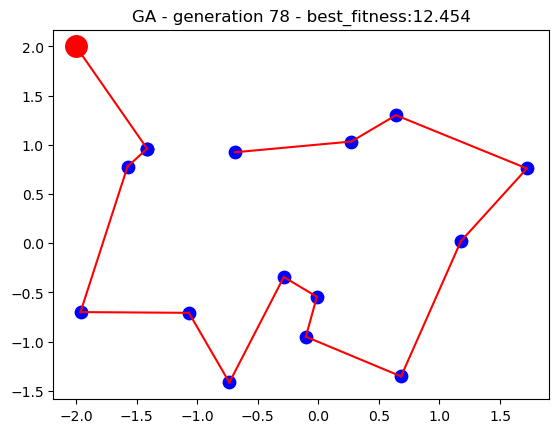

Generation 79....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



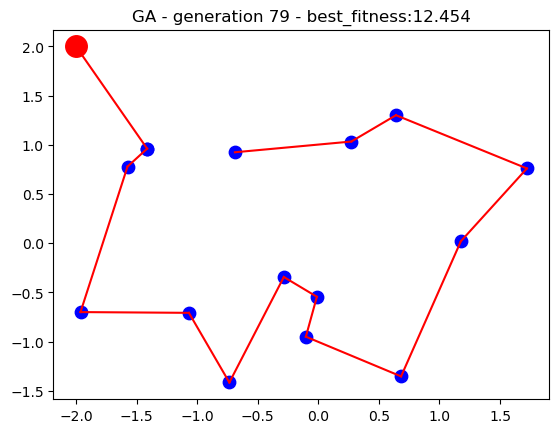

Generation 80....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



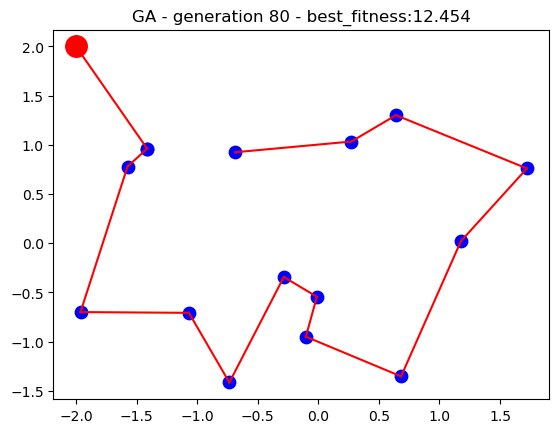

Generation 81....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



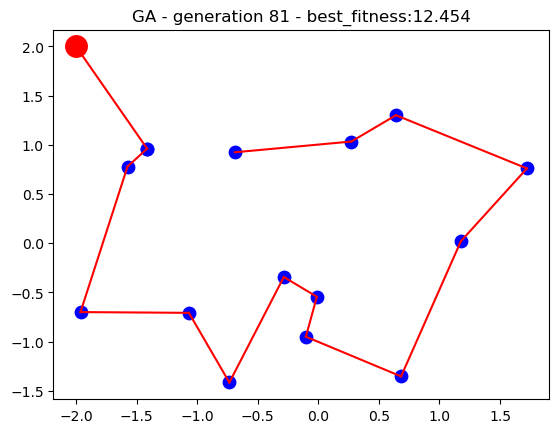

Generation 82....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



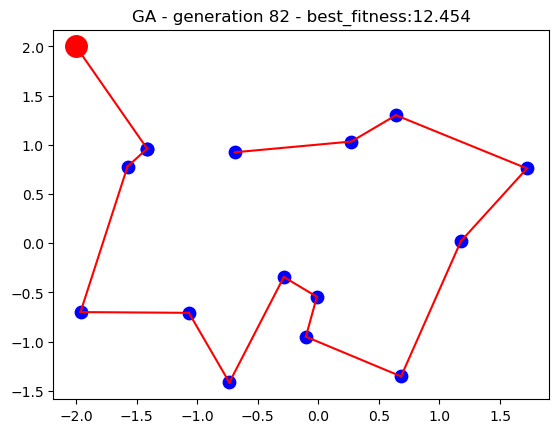

Generation 83....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



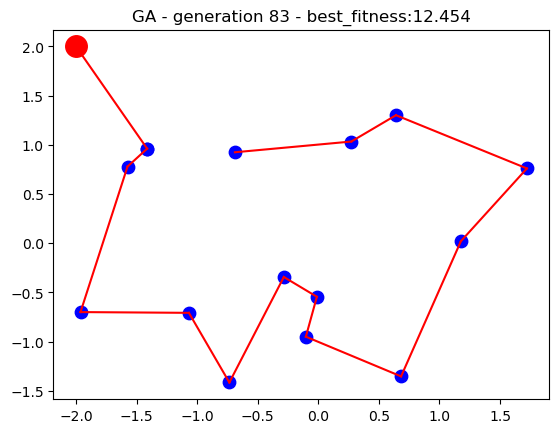

Generation 84....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



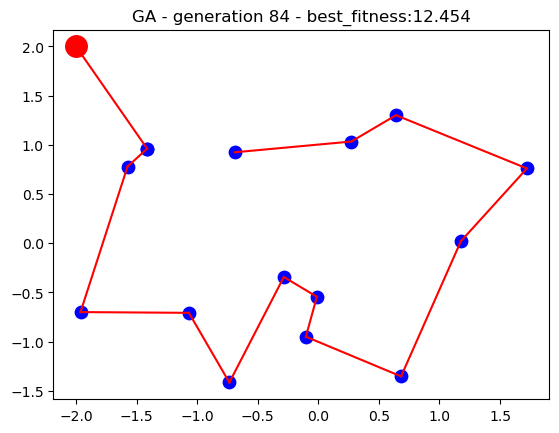

Generation 85....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



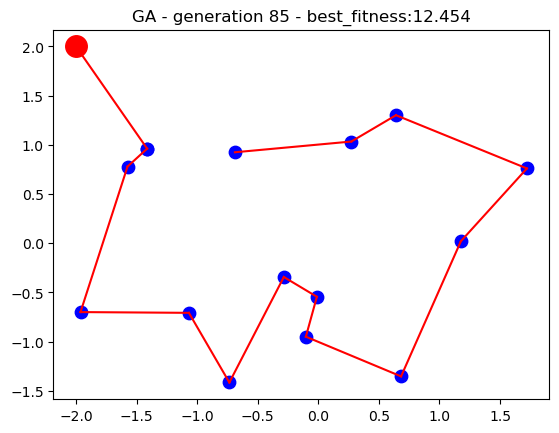

Generation 86....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



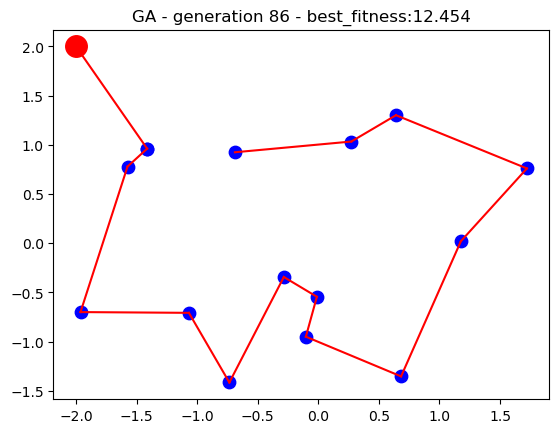

Generation 87....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



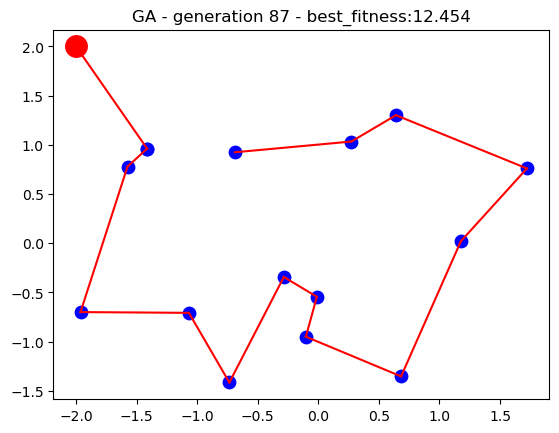

Generation 88....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



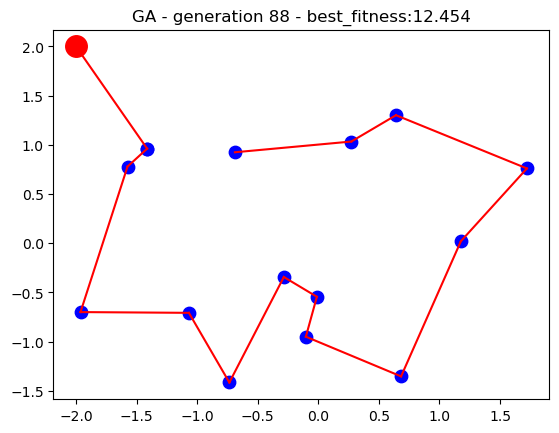

Generation 89....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



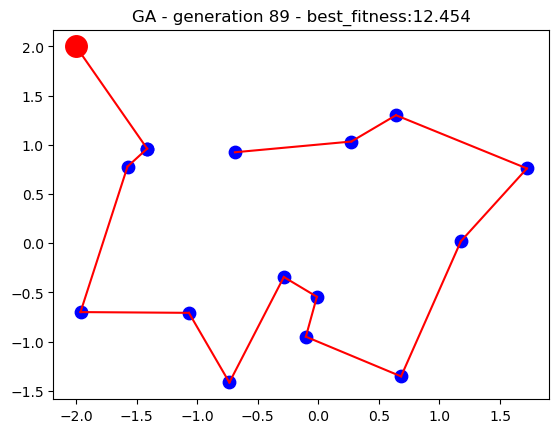

Generation 90....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



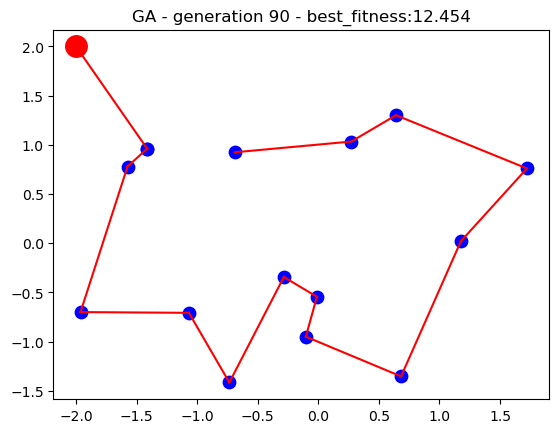

Generation 91....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



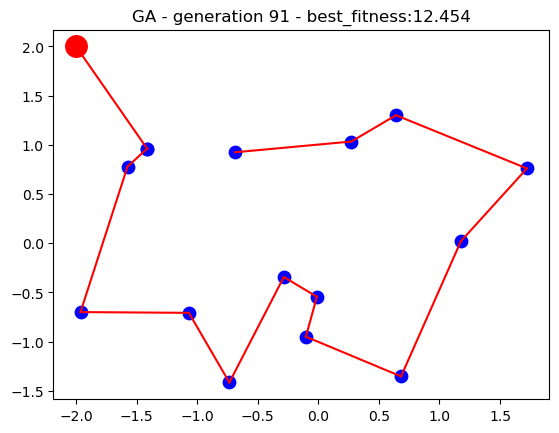

Generation 92....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



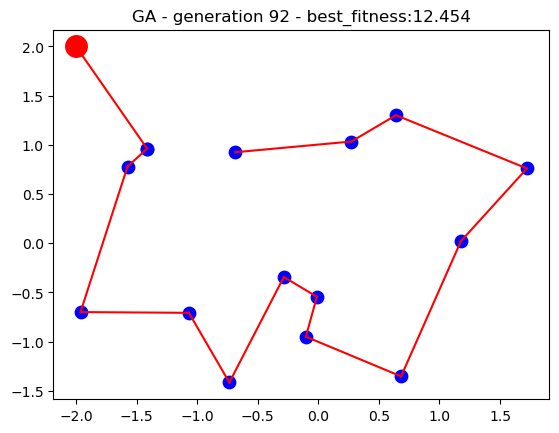

Generation 93....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



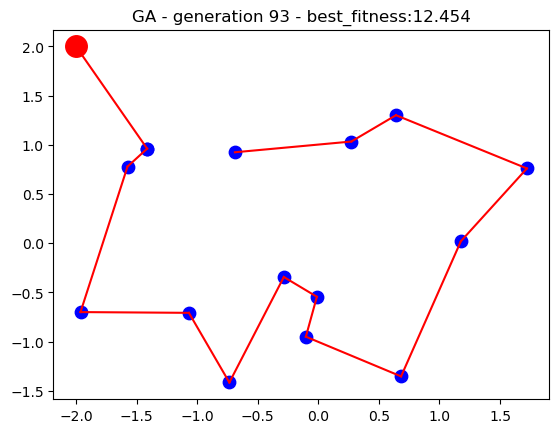

Generation 94....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



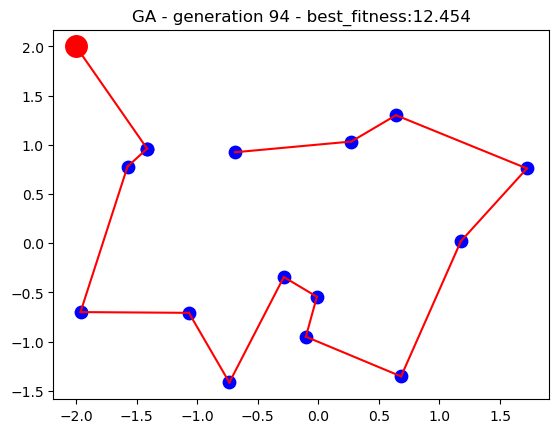

Generation 95....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



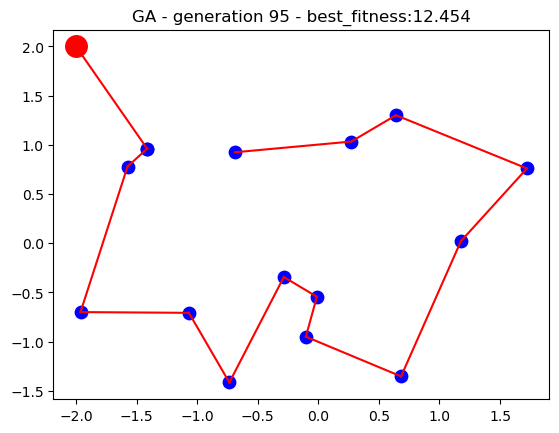

Generation 96....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



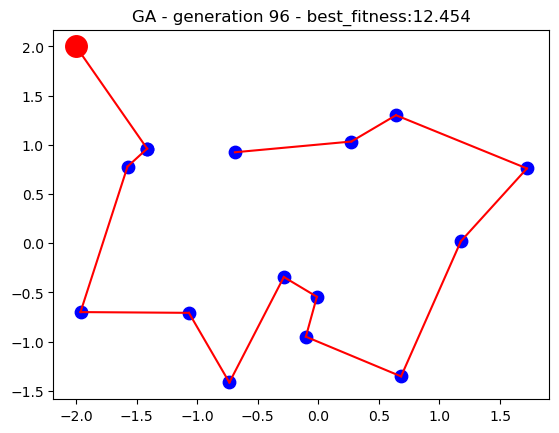

Generation 97....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



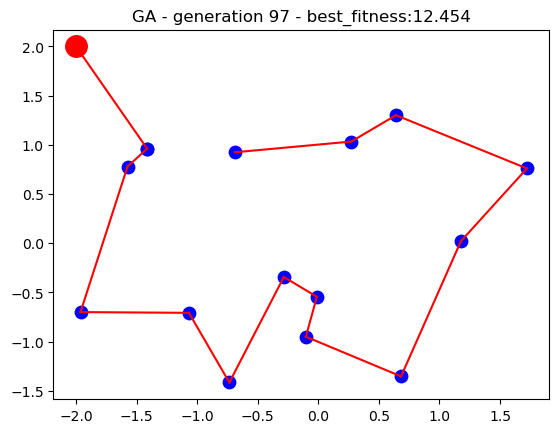

Generation 98....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



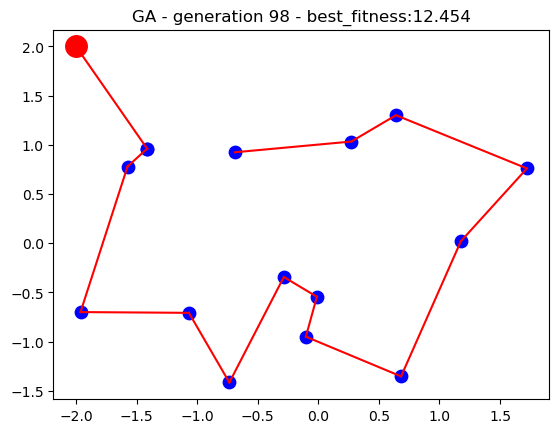

Generation 99....
Sequence: [ 5  4 14  3 10  2 12  1  7 11  8  9 13  6]
Obj func: 12.454379825987484



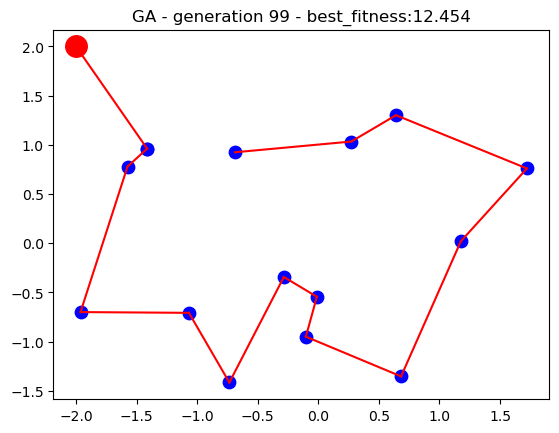

Problem solution: <__main__.Sequence object at 0x00000257BFB98190>


In [61]:
#Run Getting Algorithm
#settings-----------------------------

MaxGen = 1000#generate a thousand elements
br = 0.6#pick the best parents proportion
er = 0.3#30% of population are elite
xr = 0.3#30% of population are cross-over

mf = 0.4 #70% of mutations comes from elite
mr = 0.6#mutation ratio

gen_limit = 100

best_individual = ga_operation(gen_limit,num_stations,MaxGen)
print('Problem solution:',best_individual)